In [1]:
#import statements for running the models

import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, cluster

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Installing weights and biases and logging in 

In [2]:
%%capture
!pip install wandb
import wandb
#installing wandb dependencies

In [3]:
wandb.login() #login in another cell to directly login with broswer

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# MLP

**implementation for MNIST**

In [4]:
# Load data
mnist = datasets.fetch_openml('mnist_784')



(70000, 784) (70000,)
(70000, 784) (70000,)
<class 'numpy.ndarray'>
Label is :  0
Label is :  1
Label is :  2
Label is :  3
Label is :  4
Label is :  5
Label is :  6
Label is :  7
Label is :  8
Label is :  9


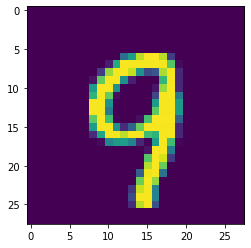

In [5]:
X = pd.DataFrame(mnist.data, columns=mnist.feature_names)
y = mnist.target
#loading data into pandas dataframe
print(X.shape,y.shape)

print(X.shape,y.shape)

X = X/255.
#normalizing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#splitting into test and train datasets
import matplotlib.pyplot as plt

#visualizing the label
x_train = np.array(X_train)
print(type(np.array(x_train)))
a,idx = np.unique(np.array(y_train),return_index=True)
for i in idx:
  print("Label is : ",np.array(y_train)[i])
  plt.imshow(x_train[i].reshape(28,28))



In [6]:
from sklearn.neural_network import MLPClassifier
#definign the model and training

mlp = MLPClassifier(hidden_layer_sizes=(50,75,150,75,50,), max_iter=20, alpha=1e-4, 
                    solver='sgd', verbose=10, random_state=420, learning_rate_init=.1)
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.61188069
Iteration 2, loss = 0.18374422
Iteration 3, loss = 0.14050088
Iteration 4, loss = 0.11902232
Iteration 5, loss = 0.10404945
Iteration 6, loss = 0.09277836
Iteration 7, loss = 0.08647001
Iteration 8, loss = 0.07702665
Iteration 9, loss = 0.07068667
Iteration 10, loss = 0.06637986
Iteration 11, loss = 0.05807180
Iteration 12, loss = 0.05461076
Iteration 13, loss = 0.05285883
Iteration 14, loss = 0.05098185
Iteration 15, loss = 0.04865160
Iteration 16, loss = 0.04390610
Iteration 17, loss = 0.04428311
Iteration 18, loss = 0.04132701
Iteration 19, loss = 0.03889111
Iteration 20, loss = 0.03784987


MLPClassifier(hidden_layer_sizes=(50, 75, 150, 75, 50), learning_rate_init=0.1,
              max_iter=20, random_state=420, solver='sgd', verbose=10)

In [7]:
print(mlp.score(X_train,y_train))
print(mlp.score(X_test,y_test))
#priting evaluation

0.9893265306122448
0.9664761904761905


Initializing Weights and biases

In [8]:
run = wandb.init(project='mnist-class', name="class-1")
#creating object for upload to wandb

wandb: Currently logged in as: vikasmehta. Use `wandb login --relogin` to force relogin


#Plotting the curves in the logged in account

In [9]:
y_pred = mlp.predict(X_test)
y_probas = mlp.predict_proba(X_test)
wandb.sklearn.plot_classifier(mlp, 
                              X_train, X_test, 
                              y_train, y_test, 
                              y_pred, y_probas, 
                              np.unique(y_train), 
                              is_binary=False, 
                              model_name='MLP-MNIST')

wandb.finish()
#generating curves and adding to wandb dashboard

wandb: 
wandb: Plotting MLP-MNIST.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
wandb: WARNING could not find any of attributes feature_importances_, feature_log_prob_, coef_ on classifier. Cannot plot feature importances.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
wandb: Logged summary metrics.
wandb: Logged class proportions.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
wandb: WARNING This function only supports binary classification at the moment and